In [5]:
import torch 
import torch.nn as nn 
import os 
from pprint import pprint
from src.device import select_device 
from src.testtrain import * 
from src.data import fetch_dataset, dataloader
from src.models.mlp import MLP 
from src.models.linear import Linear

torch.manual_seed(0)

device = select_device()

training_data, test_data = fetch_dataset("MNIST", verbose=False)

train_dataloader, test_dataloader = dataloader(
    training_data, test_data, 
    batch_size=-1)

In [12]:
model = Linear(
    data_shape = (28, 28, ), 
    target_size = 10
    ).to(device)

# model = MLP(
#     data_shape=(28, 28), 
#     hidden_size=256, 
#     scale_factor=1, 
#     num_layers=3, 
#     activation="relu", 
#     target_size=10
# ).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    model.parameters(),     
    lr=1e-3,                
    momentum=0.9
)

l1 = 0.
l2 = 1e2
pqi=0.

train_losses = []
test_losses = [] 
test_accuracy = []
PQIs = []

epochs = 100
for t in range(epochs): 
    print(f"Epoch {t+1}\n-------------------------------")
    
    train_dict = train(train_dataloader, model, loss_fn, optimizer, device, l1=l1, l2=l2, pqi=pqi)
    test_dict = test(test_dataloader, model, loss_fn, device, l1=l1, l2=l2, pqi=pqi)
    
    train_losses.append(train_dict["loss"])
    test_losses.append(test_dict["loss"])
    test_accuracy.append(test_dict["accuracy"])
    pqi = PQI(model, device, 1, 2).item()
    PQIs.append(pqi)
    
    pprint(f"L0 Sparsity : {100 * L0_sparsity(model)}%")
    pprint(f"PQ Sparsity : {pqi}")
    
    # parameterDistribution(model)

Epoch 1
-------------------------------
loss: 2.333761  [60000/60000]
Test Error: 
 Accuracy: 11.1%, Avg loss: 2.359830 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.4713767170906067'
Epoch 2
-------------------------------
loss: 2.309726  [60000/60000]
Test Error: 
 Accuracy: 14.1%, Avg loss: 2.520028 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.47144636511802673'
Epoch 3
-------------------------------
loss: 2.249414  [60000/60000]
Test Error: 
 Accuracy: 18.6%, Avg loss: 2.444571 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.4713841676712036'
Epoch 4
-------------------------------
loss: 2.175941  [60000/60000]
Test Error: 
 Accuracy: 24.5%, Avg loss: 2.362319 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.4711654782295227'
Epoch 5
-------------------------------
loss: 2.095851  [60000/60000]
Test Error: 
 Accuracy: 31.0%, Avg loss: 2.277888 

'L0 Sparsity : 0.0%'
'PQ Sparsity : 0.47079846262931824'
Epoch 6
-------------------------------
loss: 2.013633  [60000/60000]
Test Error: 
 Accuracy: 38.2%, Avg los

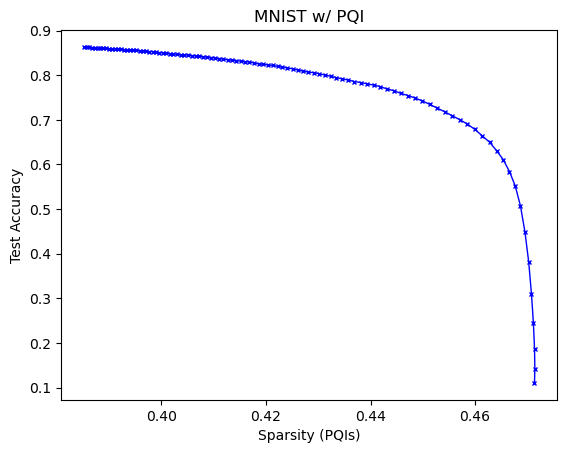

In [13]:
plt.plot(PQIs, test_accuracy, marker='x', color='b', markersize=3, linewidth=1)
plt.xlabel("Sparsity (PQIs)")
plt.ylabel("Test Accuracy")
plt.title("MNIST w/ PQI")
plt.show() 